# Importing Libraries

In [5]:
import pandas as pd

# Data Cleaning

In [6]:
import pandas as pd

# Load your local CSV files
df1 = pd.read_csv("PH_houses_v2.csv")
df2 = pd.read_csv("Housing_v2.csv")

# Standardize column names
df1.columns = ['Description', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Floor_area', 'Land_area', 'Latitude', 'Longitude', 'Link']
df2.columns = ['Description', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Floor_area', 'Land_area', 'Latitude', 'Longitude']

# Drop 'Link' column since it's not in df2
df1.drop(columns=['Link'], inplace=True)


### Cleaning df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1500 non-null   object 
 1   Location     1500 non-null   object 
 2   Price        1500 non-null   object 
 3   Bedrooms     1500 non-null   object 
 4   Bathrooms    1500 non-null   object 
 5   Floor_area   1500 non-null   object 
 6   Land_area    1500 non-null   object 
 7   Latitude     1500 non-null   object 
 8   Longitude    1500 non-null   float64
dtypes: float64(1), object(8)
memory usage: 105.6+ KB


In [8]:
columns_to_clean = ['Price' ,'Bedrooms', 'Bathrooms', 'Floor_area', 'Land_area', 'Latitude']

for column in columns_to_clean:
    # Remove commas and convert to numeric
    df1[column] = pd.to_numeric(df1[column].replace({',': ''}, regex=True), errors='coerce')

    # IMPORTANT The null values are replaced with 0
    # Convert to integers for columns where it makes sense, fill NaN with 0 for missing data
    if column in ['Price', 'Bedrooms', 'Bathrooms']:
        df1[column] = df1[column].fillna(0).astype(int)
    else:
        # 'Floor_area (sqm)' and 'Land_area (sqm)' should be float, in case of decimal values
        df1[column] = df1[column].fillna(0).astype(float)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1500 non-null   object 
 1   Location     1500 non-null   object 
 2   Price        1500 non-null   int32  
 3   Bedrooms     1500 non-null   int32  
 4   Bathrooms    1500 non-null   int32  
 5   Floor_area   1500 non-null   float64
 6   Land_area    1500 non-null   float64
 7   Latitude     1500 non-null   float64
 8   Longitude    1500 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 88.0+ KB


### Cleaning df2

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1500 non-null   object 
 1   Location     1496 non-null   object 
 2   Price        1451 non-null   float64
 3   Bedrooms     1437 non-null   float64
 4   Bathrooms    1420 non-null   float64
 5   Floor_area   1463 non-null   float64
 6   Land_area    1477 non-null   float64
 7   Latitude     1211 non-null   float64
 8   Longitude    1211 non-null   float64
dtypes: float64(7), object(2)
memory usage: 105.6+ KB


In [11]:
# IMPORTANT The null values are replaced with 0
df2['Price'] = df2['Price'].fillna(0).astype(int)
df2['Bedrooms'] = df2['Bedrooms'].fillna(0).astype(int)
df2['Bathrooms'] = df2['Bathrooms'].fillna(0).astype(int)

df2['Floor_area'] = df2['Floor_area'].fillna(0)
df2['Land_area'] = df2['Land_area'].fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1500 non-null   object 
 1   Location     1496 non-null   object 
 2   Price        1500 non-null   int32  
 3   Bedrooms     1500 non-null   int32  
 4   Bathrooms    1500 non-null   int32  
 5   Floor_area   1500 non-null   float64
 6   Land_area    1500 non-null   float64
 7   Latitude     1211 non-null   float64
 8   Longitude    1211 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 88.0+ KB


### Combining data

In [12]:
# # Concatenate the datasets
housing_df = pd.concat([df1, df2], ignore_index=True)

# # Display the combined dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  3000 non-null   object 
 1   Location     2996 non-null   object 
 2   Price        3000 non-null   int32  
 3   Bedrooms     3000 non-null   int32  
 4   Bathrooms    3000 non-null   int32  
 5   Floor_area   3000 non-null   float64
 6   Land_area    3000 non-null   float64
 7   Latitude     2711 non-null   float64
 8   Longitude    2711 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 175.9+ KB


### Removing Duplicates

In [13]:
# Find and display the duplicates based on all columns
duplicates = housing_df[housing_df.duplicated()]
duplicates

Description  \
180   Studio Deluxe (30E) for Sale in Empress at Cap...   
181   Studio Deluxe (31E) for Sale in Empress at Cap...   
182   1-Bedroom Unit (1023) for Sale in Maple at Ver...   
183   1-Bedroom Unit (8A) for Sale in Empress at Cap...   
184   1-Bedroom Unit (19A) for Sale in Empress at Ca...   
...                                                 ...   
2402       Brand New 3 Storey Duplex Katarungan Village   
2520  Ready to Occupy| Smart Home |2 Storey House an...   
2550  5-Bedroom House and Lot For Sale in Angeles Ci...   
2551  Stunning Ultra Modern House and Lot for Sale i...   
2850  5BR Multi-Level Modern House and Lot for Sale ...   

                              Location      Price  Bedrooms  Bathrooms  \
180                      Oranbo, Pasig   12527000         1          1   
181                      Oranbo, Pasig   12546000         1          1   
182                       Ugong, Pasig   16332000         1          0   
183                      Oranbo, Pasig   21828000         1          1   
184                      Oranbo, Pasig   21946000         1          1   
...                                ...        ...       ...        ...   
2402  katarungan Poblacion, Muntinlupa    8000000         4          4   
2520        Woodridge Park Ma-A, Davao   20000000         4          3   
2550                   Cuayan, Angeles   23800000         5          7   
2551               Moonwalk, Paranaque  150000000         6          6   
2850                San Andres, Cainta   26500000         5          5   

      Floor_area  Land_area   Latitude   Longitude  
180         45.0        0.0  14.575822  121.064324  
181         45.0        0.0  14.575822  121.064324  
182         58.0        0.0  14.588882  121.079016  
183         65.0        0.0  14.575822  121.064324  
184         65.0        0.0  14.575822  121.064324  
...          ...        ...        ...         ...  
2402       210.0       78.0  14.388919  121.025527  
2520       180.0      180.0   7.100911  125.587471  
2550       342.0      208.0  15.149137  120.545812  
2551       800.0      450.0  14.491858  121.014671  
2850       350.0      150.0  14.573892  121.111182  

[282 rows x 9 columns]

In [14]:
housing_df.drop_duplicates(inplace=True)
housing_df.reset_index(drop=True, inplace=True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  2718 non-null   object 
 1   Location     2714 non-null   object 
 2   Price        2718 non-null   int32  
 3   Bedrooms     2718 non-null   int32  
 4   Bathrooms    2718 non-null   int32  
 5   Floor_area   2718 non-null   float64
 6   Land_area    2718 non-null   float64
 7   Latitude     2443 non-null   float64
 8   Longitude    2443 non-null   float64
dtypes: float64(4), int32(3), object(2)
memory usage: 159.4+ KB


## Missing Values

As stated earlier, null values are replaced with 0. Imputation method will be determined later after Exploratory Data Analysis to ensure correct preprocessing method.

In [15]:
# Cleaned df
housing_df.head()

Description              Location  \
0  2-Bedroom Unit for Sale in Amisa Private Resid...     Mactan, Lapu-Lapu   
1  1-Bedroom Unit for Sale in Amisa Private Resid...     Mactan, Lapu-Lapu   
2  Offices at The Galleon - Prime Unit (11G) for ...    San Antonio, Pasig   
3  1-Bedroom Unit (821) for Sale in Maple at Verd...          Ugong, Pasig   
4  Alice 2 Storey Townhouse For Sale in Lancaster...  Tapia, General Trias   

      Price  Bedrooms  Bathrooms  Floor_area  Land_area   Latitude   Longitude  
0  15916180         2          2        74.0        0.0  10.305155  124.011241  
1   8730355         1          1        41.0        0.0  10.305155  124.011241  
2  27448000         0          0        82.0        0.0  14.588716  121.060009  
3  16011000         1          0        58.0        0.0  14.588882  121.079016  
4   1935600         3          0        40.0       40.0  14.355070  120.876425

# Importing Libraries for EDA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import pandas as pd
import plotly.express as px
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

In [17]:
zero_count = (housing_df['Floor_area'] == 0).sum()
print(f"Number of rows with 0: {zero_count}")

Number of rows with 0: 87


In [18]:
zero_count = (housing_df['Price'] == 0).sum()
print(f"Number of rows with 0: {zero_count}")

Number of rows with 0: 85


In [19]:
#ensure values are displayed as integers with thousands separators
pd.options.display.float_format = '{:,.0f}'.format

#filter out 0 values
Ahousing_df = housing_df[housing_df['Price'] > 0].copy()
Bhousing_df = housing_df[housing_df['Floor_area'] > 0].copy()

#compute descriptive stats
price_stats = Ahousing_df[['Price']].describe()
floor_area_stats = Bhousing_df[['Floor_area']].describe()
bedroom_stats = housing_df[['Bedrooms']].describe()
bathroom_stats = housing_df[['Bathrooms']].describe()

#combine all stats into a single DataFrame
combined_stats = pd.concat([price_stats, floor_area_stats, bedroom_stats, bathroom_stats], axis=1)

#display result
print(combined_stats)


              Price  Floor_area  Bedrooms  Bathrooms
count         2,632       2,631     2,718      2,718
mean     23,371,222         148         3          2
std      58,475,251         193         2          2
min         300,000          16         0          0
25%       5,234,250          53         1          1
50%       9,845,500          80         3          1
75%      21,000,000         166         4          3
max   1,200,000,000       2,200        13         43


# 1. What housing market segments emerge from clustering listings by price and floor area, and how can these clusters inform property buyers about affordability and luxury in Philippine real estate?

For the first exploratory question, we wanted to determine the cluster listings by price and floor area, and how these clusters inform the audiences regarding affordability and luxury in Philippine real estate.

We used the **elbow method** to determine the most optimal number of clusters (**K**). Before applying clustering, we cleaned the dataset by dropping entries with missing or zero values in the `Price` and `Floor_area` columns. We also removed outliers using the Interquartile Range (IQR) method to make sure extreme values wouldn't skew the clustering results.

After cleaning the data, we selected `Price` and `Floor_area` as our clustering features and standardized them to ensure equal weighting. We then ran K-Means clustering for a range of values from K=1 to K=10 and plotted the Within-Cluster Sum of Squares (WCSS) for each. The elbow plot clearly showed that **K = 4** was the point where the rate of decrease in WCSS began to slow down significantly. This suggests that four clusters strike a good balance between simplicity and accuracy, allowing us to group the listings meaningfully based on affordability and floor area.

These clusters serve as a foundation for segmenting listings into categories such as budget-friendly, mid-range, high-end, and luxury properties—helping users better understand how real estate prices relate to floor space across the country.


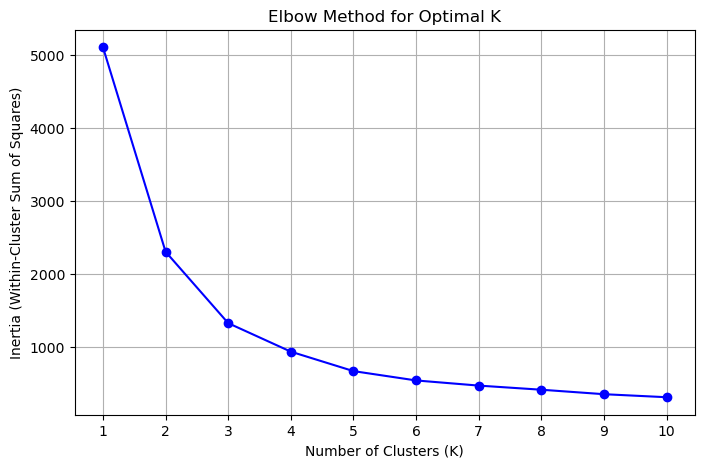

In [20]:
# Drop missing values and filter out zero values
housing_df = housing_df.dropna(subset=['Floor_area', 'Price']).copy()
housing_df = housing_df[(housing_df['Floor_area'] > 0) & (housing_df['Price'] > 0)].copy()

# Select relevant features
X = housing_df[['Floor_area', 'Price']].values

# Standardize data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)  # Testing 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid()
plt.show()


In [21]:
# Create a clean copy of the DataFrame
housing_df_clean = housing_df.copy()

# Remove rows where Floor Area or Price is 0
housing_df_clean = housing_df_clean[(housing_df_clean['Floor_area'] > 0) & (housing_df_clean['Price'] > 0)].copy()

# Convert Price to millions
housing_df_clean['Price'] = housing_df_clean['Price'] / 1_000_000  # Now in millions

# Rename column to reflect new unit
housing_df_clean = housing_df_clean.rename(columns={'Price': 'Price_millions'})

# Reset index after cleaning
housing_df_clean = housing_df_clean.reset_index(drop=True)


### 🔹 Quick Clustering on Raw Data
**Purpose:** Rapid clustering and visualization of the dataset with minimal preprocessing.

**Key characteristics:**
- Applies K-Means clustering directly on the dataset (`housing_df`) without removing zero values or outliers.
- Price is converted to millions for better readability, but the raw data (including possible anomalies) is used.
- Custom colors are manually applied to each cluster using a simple `for` loop and `matplotlib`.
- The resulting plot is functional but may include **skewed or noisy clusters** due to lack of data cleaning.

**Use case:**  
Good for an initial look at how clustering works or for prototyping the clustering logic.

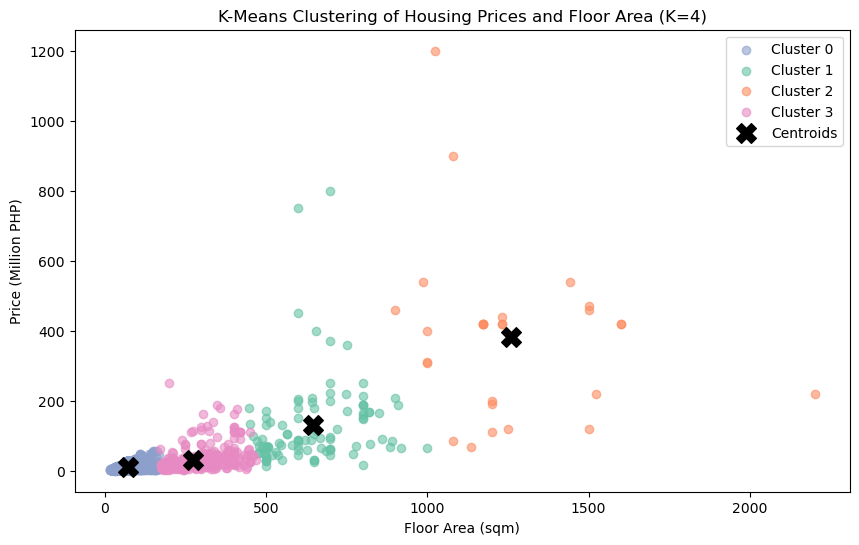

In [22]:
# Define custom colors in the desired order: blue, green, orange, pink
custom_colors = ['#8da0cb', '#66c2a5', '#fc8d62', '#e78ac3']

# Extract features for clustering
X = housing_df[['Floor_area', 'Price']].copy()
X['Price'] = X['Price'] / 1e6  # Convert price to millions

# Apply KMeans clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
housing_df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(
        X[housing_df['Cluster'] == cluster]['Floor_area'],
        X[housing_df['Cluster'] == cluster]['Price'],
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=custom_colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Labels and title
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Price (Million PHP)')
plt.title('K-Means Clustering of Housing Prices and Floor Area (K=4)')
plt.legend()
plt.show()


### Cleaner Clustering with Preprocessing
**Purpose:** More refined and reliable clustering after thoroughly cleaning the dataset.

**Key characteristics:**
- Filters out entries with zero `Floor_area` or `Price`.
- Converts price to millions and **renames the column** for clarity (`Price_millions`).
- Removes extreme outliers based on the **99.5th percentile** for both features to prevent skewed results.
- Uses **Seaborn's `scatterplot`** for clearer cluster coloring and visualization.
- Clustering is done on the cleaned dataset (`housing_df_clean`), leading to **more meaningful and reliable clusters**.


Removed Outliers:
[1829, 1831, 1868, 1901, 1991, 2014, 2096, 2105, 2140, 2161, 2220, 2225, 2241, 2282, 2314, 2330, 2343, 2414, 2531]


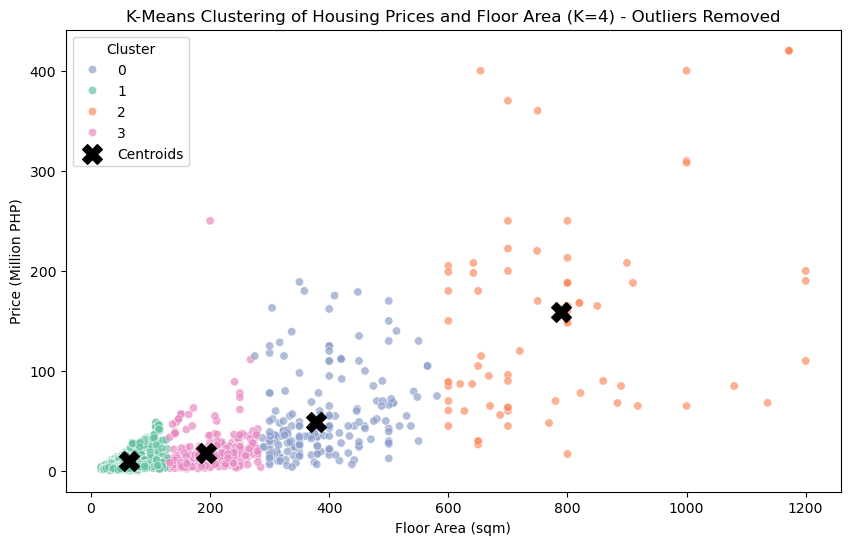

In [23]:
# Cleaner visualization
# Create a clean copy of the DataFrame
housing_df_clean = housing_df.copy()

# Remove rows where Floor Area or Price is 0
housing_df_clean = housing_df_clean[(housing_df_clean['Floor_area'] > 0) & (housing_df_clean['Price'] > 0)].copy()

# Convert Price to millions
housing_df_clean['Price'] = housing_df_clean['Price'] / 1_000_000  # Now in millions

# Rename column to reflect new unit
housing_df_clean = housing_df_clean.rename(columns={'Price': 'Price_millions'})

# Reset index after cleaning
housing_df_clean = housing_df_clean.reset_index(drop=True)

# Define upper thresholds using the 99th percentile (for outlier removal)
price_threshold = np.percentile(housing_df_clean['Price_millions'], 99.5)
floor_area_threshold = np.percentile(housing_df_clean['Floor_area'], 99.5)

# Identify outliers (rows that will be removed)
outliers = housing_df_clean[
    (housing_df_clean['Price_millions'] > price_threshold) |
    (housing_df_clean['Floor_area'] > floor_area_threshold)
]

# Remove outliers
housing_df_clean = housing_df_clean.drop(outliers.index).copy()

# Display the removed outliers
print("Removed Outliers:")
print(outliers.index.tolist())

# Apply K-Means Clustering
X = housing_df_clean[['Floor_area', 'Price_millions']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
housing_df_clean['Cluster'] = kmeans.fit_predict(X)

# Define cluster colors in the order: blue, green, orange, pink
cluster_colors = ['#8da0cb', '#66c2a5', '#fc8d62', '#e78ac3']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=housing_df_clean['Floor_area'],
    y=housing_df_clean['Price_millions'],
    hue=housing_df_clean['Cluster'],
    palette=cluster_colors,
    alpha=0.7
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

# Labels and title
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Price (Million PHP)")
plt.title("K-Means Clustering of Housing Prices and Floor Area (K=4) - Outliers Removed")
plt.legend(title="Cluster")
plt.show()


### Cluster Analysis

From the scatter plot, we observe four distinct clusters (as defined in the legend), each representing a group of housing listings that share similar characteristics in terms of floor area and price:

- **Cluster 0 (Blue):**  
  This is the largest cluster and contains the majority of listings with **moderate floor areas (approx. 150–600 sqm)** and **mid-range prices (roughly 10–100 million PHP)**. This group likely represents the **middle market segment**—properties that are relatively spacious but still within upper-middle income affordability.

- **Cluster 1 (Green):**  
  These listings have **smaller floor areas (below 200 sqm)** and **lower price points (below 30 million PHP)**. They are tightly packed in the bottom-left corner of the plot. This cluster likely represents **budget-friendly or compact housing options**, such as small residential units or affordable housing developments.

- **Cluster 2 (Orange):**  
  This cluster is composed of listings with **very large floor areas (600–1200+ sqm)** and **high prices (typically above 100 million PHP)**. These outliers suggest **luxury properties**, such as high-end mansions or estates, catering to the premium market. The cluster is also more sparsely populated, reflecting the rarity of such listings.

- **Cluster 3 (Pink):**  
  Listings in this group have **small to mid-sized floor areas (around 100–300 sqm)** but **a slightly wider price spread (up to ~200 million PHP)**. This may represent **compact luxury units**, such as upscale condos or prime-location properties with high price tags despite smaller size.

### Centroid Placement

The black X markers represent the **centroids** of each cluster, summarizing the average price and floor area of each group. These centroids help highlight the differences in scale and cost between market segments.

### Insights

- There is a general upward trend in price as floor area increases, but it's not strictly linear—some properties command much higher prices for relatively modest floor areas (e.g., Cluster 3).
- The clusters effectively distinguishes **affordable housing, standard family homes, high-end urban units**, and **luxury estates**.
- This clustering provides a practical framework for **targeting property buyers**, **price benchmarking**, or even **market segmentation** in real estate platforms.



# 2. How are residential property price categories distributed across geographic locations, and what spatial patterns can be observed in terms of affordability and luxury in the Philippine housing market?


### Spatial Visualization of Housing Price Categories

To better understand the geographic distribution of property prices in the dataset, we created an interactive map using **Folium**. Listings were categorized into three price levels based on the **33rd and 66th percentiles** of property prices:

- **Low** (bottom 33% of prices)
- **Mid** (middle 33% of prices)
- **High** (top 34% of prices)

Each listing was assigned a color-coded marker on the map based on its price category:
- Blue for **Low**
- Green for **Mid**
- Red for **High**

We first filtered out entries without valid geographic coordinates to ensure accurate placement on the map. For each remaining listing, a marker was placed at its latitude and longitude, with a popup displaying the **price**, **location**, and **assigned price category**.

This visualization allows users to **interactively explore the spatial distribution of housing listings** across different price tiers, helping identify patterns of affordability, clustering of high-value


In [24]:
housing_map_df = housing_df.dropna(subset=["Latitude", "Longitude"])

# --- Define dynamic price percentiles (33rd and 66th) ---
low_threshold = np.percentile(housing_map_df["Price"], 33)
mid_threshold = np.percentile(housing_map_df["Price"], 66)

# --- Price category function ---
def price_category(price):
    if price <= low_threshold:
        return "Low", "blue"
    elif price <= mid_threshold:
        return "Mid", "green"
    else:
        return "High", "red"

# --- Create the base Folium map ---
m = folium.Map(
    location=[housing_map_df["Latitude"].mean(), housing_map_df["Longitude"].mean()],
    zoom_start=6
)

# --- Add property markers ---
for _, row in housing_map_df.iterrows():
    category, color = price_category(row["Price"])
    
    location_text = row["Location"] if pd.notna(row["Location"]) else "Unknown Location"
    popup_text = f"""
    <b>Price:</b> ₱{row['Price']:,.0f}<br>
    <b>Location:</b> {location_text}<br>
    <b>Price Category:</b> {category}
    """

    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=color)
    ).add_to(m)


#display the map
m


**After visualization, there are locations outside the Philippines that are plotted based on the latitude and longitude of the dataset, this will be handled later on further cleaning.**

# 3. How does the average housing price per square meter vary across cities in the Philippines, and what can these differences reveal about regional real estate market trends and urban valuation?


### Average Price per Square Meter by City

This bar graph illustrates the distribution of real estate prices per square meter across various cities in the dataset.

To begin the analysis, a new DataFrame was created where the `Location` values were generalized to city-level entries. The data was then cleaned by:
- Removing entries with missing location information
- Filtering out properties with a floor area of zero to ensure accurate calculations

Next, the **price per square meter** was calculated for each property by dividing its total price by its floor area. These values were then averaged at the city level to compute a representative cost per square meter for each city.

To avoid skewed results, extreme values—particularly those from **General Luna**, which exhibited unusually high prices—were excluded from the visualization.

The results are presented as a horizontal bar chart, where:
- Cities are listed along the **Y-axis**
- Their corresponding **average price per square meter** is shown on the **X-axis**

The bars have been formatted with thicker outlines and labeled with readable text to improve clarity. This visualization allows for easy comparison of real estate costs across different urban areas, helping identify which cities offer the most affordable versus most expensive housing markets.


In [25]:
#create new dataframe with renamed locations
Cityhousing_df = housing_df.copy()

#ensure 'Location' is a string and extract city names
Cityhousing_df['City'] = Cityhousing_df['Location'].astype(str).apply(lambda x: x.split(',')[-1].strip())

In [26]:
#drop missing locations
Cityhousing_df = Cityhousing_df.dropna(subset=['Location']).copy()

#remove rows where Floor_area is 0
Cityhousing_df = Cityhousing_df[Cityhousing_df['Floor_area'] > 0].copy()

#calculate price per square meter
Cityhousing_df['Price_per_sqm'] = Cityhousing_df['Price'] / Cityhousing_df['Floor_area']

#compute the average price per square meter per city
avg_price_per_sqm = Cityhousing_df.groupby('City')['Price_per_sqm'].mean().reset_index()

#remove General Luna due to extreme values
avg_price_per_sqm = avg_price_per_sqm[avg_price_per_sqm['City'] != 'General Luna']

#create a horizontal bar chart
fig = px.bar(
    avg_price_per_sqm,
    y='City',  #cities on Y-axis
    x='Price_per_sqm',  #price/sqm on X-axis
    text_auto='.2s',
    title="Average Price per Sqm by City"
)

#make bars thicker
fig.update_traces(marker=dict(line=dict(width=2)))

#improve layout
fig.update_layout(
    xaxis_title="Average Price per Sqm (PHP)",
    yaxis_title="City",
    bargap=0.2,
    height=3000 #this could be changed
)

#show the plot
fig.show()


# Further Cleaning

### Dropping of nan longitude and latitude

In [27]:
housing_df.dropna(subset=['Longitude', 'Latitude'], inplace=True)
housing_df.reset_index(drop=True, inplace=True)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  2290 non-null   object 
 1   Location     2287 non-null   object 
 2   Price        2290 non-null   int32  
 3   Bedrooms     2290 non-null   int32  
 4   Bathrooms    2290 non-null   int32  
 5   Floor_area   2290 non-null   float64
 6   Land_area    2290 non-null   float64
 7   Latitude     2290 non-null   float64
 8   Longitude    2290 non-null   float64
 9   Cluster      2290 non-null   int32  
dtypes: float64(4), int32(4), object(2)
memory usage: 143.3+ KB


### Dropping of data points outside the Philippines

In [28]:
mask = (
    (housing_df['Latitude'].between(4.23, 21)) &
    (housing_df['Longitude'].between(116, 127))
)
housing_df = housing_df[mask]

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2272 entries, 0 to 2289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  2272 non-null   object 
 1   Location     2269 non-null   object 
 2   Price        2272 non-null   int32  
 3   Bedrooms     2272 non-null   int32  
 4   Bathrooms    2272 non-null   int32  
 5   Floor_area   2272 non-null   float64
 6   Land_area    2272 non-null   float64
 7   Latitude     2272 non-null   float64
 8   Longitude    2272 non-null   float64
 9   Cluster      2272 non-null   int32  
dtypes: float64(4), int32(4), object(2)
memory usage: 159.8+ KB


## Land_area missing value vase

There are a lot of missing or 0 values in the Land_area column.  The data points with 0 values are assumed to be of appartment complex or condo type where the property technically does not have a whole land.

In [29]:
# Save the cleaned DataFrame to a local CSV file
housing_df.to_csv("cleaned_housing.csv", index=False)

# Importing libraries for Data Modeling

In [30]:
import pandas as pd
import plotly.express as px
import json
import geopandas as gpd
from shapely.geometry import Point, shape
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import KMeans
from ipywidgets import HBox, VBox
import matplotlib.colors as mcolors  
from sklearn.preprocessing import StandardScaler

# Data Modeling

### Adding "region" column to visualize bar chart better

### Assigning Regional Labels to Housing Data Using GeoJSON

To enrich the dataset with geographic context, this step adds a **region label** to each housing entry based on its latitude and longitude coordinates.

We begin by loading a GeoJSON file (`ph.json`) that contains the geographic boundaries of administrative regions in the Philippines. The file is read and converted into a `GeoDataFrame` for spatial analysis.

A custom function `find_region()` is defined to determine which region a property belongs to by:
- Creating a point from each property's longitude and latitude
- Checking if the point is contained within any polygon or multipolygon defined in the GeoJSON file
- Returning the corresponding region name if a match is found

This function is then applied to each row in the `housing_df` DataFrame to populate a new column called `region`.

Finally, the updated dataset is saved as a new CSV file:  
**`cleaned_housing_with_region.csv`**, stored locally in the `DATA101-FinalProj` directory. This enriched dataset will be useful for analyzing housing trends on a regional level.


In [31]:
# Updated path to your local GeoJSON file
geojson_path = "ph.json"

# Load the GeoJSON file
with open(geojson_path, encoding='utf-8') as f:
    phil_geojson = json.load(f)

# Convert GeoJSON to GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(phil_geojson["features"])

# Function to find the corresponding region name based on coordinates
def find_region(lat, lon):
    point = Point(lon, lat)  # Create a point with (longitude, latitude)
    for feature in phil_geojson["features"]:
        geometry = feature["geometry"]

        if geometry["type"] == "Polygon":
            polygon = shape(geometry)
            if polygon.contains(point):
                return feature["properties"]["name"]

        elif geometry["type"] == "MultiPolygon":
            for poly in geometry["coordinates"]:
                polygon = shape({"type": "Polygon", "coordinates": poly})
                if polygon.contains(point):
                    return feature["properties"]["name"]

    return None

# Apply the function to assign regions to each property
housing_df["region"] = housing_df.apply(lambda row: find_region(row["Latitude"], row["Longitude"]), axis=1)

# Save the updated DataFrame locally
updated_housing_file_path = "cleaned_housing_with_region.csv"
housing_df.to_csv(updated_housing_file_path, index=False)

# Display first few rows
housing_df.head()


Description              Location  \
0  2-Bedroom Unit for Sale in Amisa Private Resid...     Mactan, Lapu-Lapu   
1  1-Bedroom Unit for Sale in Amisa Private Resid...     Mactan, Lapu-Lapu   
2  Offices at The Galleon - Prime Unit (11G) for ...    San Antonio, Pasig   
3  1-Bedroom Unit (821) for Sale in Maple at Verd...          Ugong, Pasig   
4  Alice 2 Storey Townhouse For Sale in Lancaster...  Tapia, General Trias   

      Price  Bedrooms  Bathrooms  Floor_area  Land_area  Latitude  Longitude  \
0  15916180         2          2          74          0        10        124   
1   8730355         1          1          41          0        10        124   
2  27448000         0          0          82          0        15        121   
3  16011000         1          0          58          0        15        121   
4   1935600         3          0          40         40        14        121   

   Cluster                   region  
0        0          Central Visayas  
1        0          Central Visayas  
2        0  National Capital Region  
3        0  National Capital Region  
4        0               Calabarzon

In [32]:
# Check for null values in the "region" column
null_region_count = housing_df["region"].isnull().sum()

# Display the count of null values
null_region_count

7

In [33]:
housing_df.dropna(subset=["region"], inplace=True)

In [34]:
housing_df.to_csv("final_cleaned_housing.csv", index=False)

In [35]:
housing_file_path = "final_cleaned_housing.csv"
housing_df = pd.read_csv(housing_file_path)

## 1. Scatter Map Visualization

In [36]:
# Calculate 33rd and 66th percentiles for fair Low-Mid-High split
low_price_threshold = np.percentile(housing_df["Price"], 33)
mid_price_threshold = np.percentile(housing_df["Price"], 66)

# Categorize prices into Low, Mid, High using percentiles
def categorize_price(price):
    if price <= low_price_threshold:
        return "Low"
    elif price <= mid_price_threshold:
        return "Mid"
    else:
        return "High"

housing_df["Price_Category"] = housing_df["Price"].apply(categorize_price)

# Define custom color scale
color_scale = {
    "Low": "#fdd0a2",   # Light orange
    "Mid": "#fc9272",   # Medium red
    "High": "#de2d26"   # Dark red
}

# Create the scatter map using updated price category
fig = px.scatter_mapbox(
    housing_df,
    lat="Latitude",
    lon="Longitude",
    color="Price_Category",
    color_discrete_map=color_scale,
    category_orders={"Price_Category": ["High", "Mid", "Low"]},
    hover_name="Location",
    hover_data={
        "Price": True,
        "Floor_area": True,
        "Latitude": False,
        "Longitude": False
    },
    zoom=4.4,
    title="Scatter Map of Property Prices by Category (Percentile-Based)"
)

# Style adjustments
fig.update_traces(marker=dict(size=10))
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

# Display the map
fig.show()

## 2. Bar Chart Visualization

### Insights on the Bar Chart

The bar chart shows that the **National Capital Region** has the highest average price per square meter (PHP), at around **₱200,000**. Second place goes to the **Cordillera Administrative Region**, which has an average of around **₱150,000**. This bar graph is a great indicator of relative land and property valuation across Philippine regions, offering a clear view of where housing is most expensive on a per-square-meter basis.

This visualization can guide **buyers** looking for affordability, **investors** seeking high-yield locations, and **policymakers** prioritizing housing programs. It reinforces the idea that **price per square meter** is a more accurate measure of land value than total property price—especially when comparing across diverse regions.


C:\Users\Charles\AppData\Local\Temp\ipykernel_35496\1746540625.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




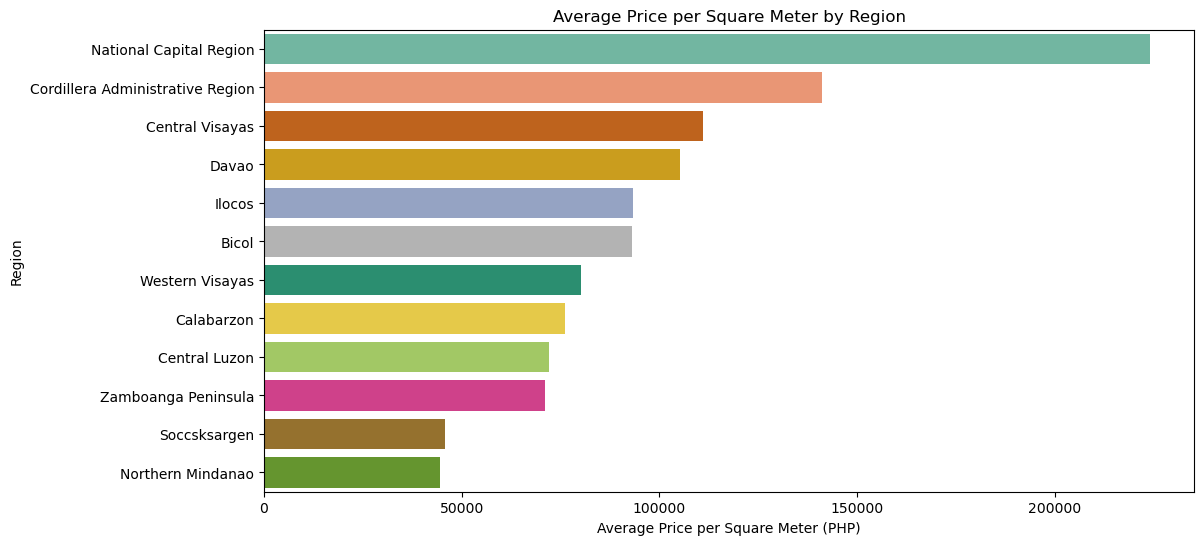

In [37]:
# Compute average price per square meter per region
housing_df["Price_per_sqm"] = housing_df["Price"] / housing_df["Floor_area"]
region_avg_price = housing_df.groupby("region")["Price_per_sqm"].mean().reset_index()

# Define color mapping for regions based on provided specifications
region_colors = {
    "National Capital Region": "#66c2a5",  # Green-Teal
    "Cordillera Administrative Region": "#fc8d62",  # Orange
    "Ilocos": "#8da0cb",  # Blue
    "Cagayan Valley": "#e78ac3",  # Pink
    "Central Luzon": "#a6d854",  # Lime Green
    "Calabarzon": "#ffd92f",  # Yellow
    "Mimaropa": "#e5c494",  # Beige
    "Bicol": "#b3b3b3",  # Gray
    "Western Visayas": "#1b9e77",  # Dark Teal
    "Central Visayas": "#d95f02",  # Dark Orange
    "Eastern Visayas": "#7570b3",  # Purple
    "Zamboanga Peninsula": "#e7298a",  # Magenta
    "Northern Mindanao": "#66a61e",  # Dark Green
    "Davao": "#e6ab02",  # Gold
    "Soccsksargen": "#a6761d",  # Brown
    "Caraga": "#666666",  # Dark Gray
    "Autonomous Region in Muslim Mindanao": "#ff69b4"  # Bright Pink
}

# Sort regions by average price for better visualization
region_avg_price = region_avg_price.sort_values(by="Price_per_sqm", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Price_per_sqm",
    y="region",
    data=region_avg_price,
    palette=[region_colors.get(region, "#999999") for region in region_avg_price["region"]]  # Use default gray if not found
)

# Labels and title
plt.xlabel("Average Price per Square Meter (PHP)")
plt.ylabel("Region")
plt.title("Average Price per Square Meter by Region")

# Show the plot
plt.show()

## 3. Scatter Plot Visualization

### Insights on the Scatterplot of Price (PHP) and Floor Area (sqm)

This updated scatterplot, designed for user presentation, removes centroid markings for a cleaner and more intuitive visual experience. Instead, **color-coded clusters** are used to clearly distinguish groups of properties based on similarities in **price** and **floor area**.

This visualization can significantly aid users—especially those who are **house-hunting within specific budget ranges** or looking for **properties of a certain size**. By quickly identifying which cluster their preferences fall into, users can narrow down their options more efficiently.

Whether someone is searching for **affordable starter homes** or **more spacious, premium listings**, the clustered layout helps them visually compare and focus on properties that align with both their **needs** and **financial constraints**.


In [38]:
df = pd.read_csv("final_cleaned_housing.csv")
df.columns = [col.lower() for col in df.columns]

# Calculate price per sqm and price range
df['price_per_sqm'] = df['price'] / df['floor_area']

quantiles = df['price'].quantile([0.33, 0.66]).values
def categorize_price(value):
    if value < quantiles[0]:
        return 'Low'
    elif value < quantiles[1]:
        return 'Mid'
    else:
        return 'High'

df['price_range'] = df['price'].apply(categorize_price)
df['price_range'] = pd.Categorical(df['price_range'], categories=['Low', 'Mid', 'High'], ordered=True)

# Standardize features before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['floor_area', 'price']])

# KMeans clustering (same parameters as web app)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Convert to string for consistent color mapping
df['cluster'] = df['cluster'].astype(str)

# Define cluster colors (same as web app)
cluster_color_map = {
    '0': '#8da0cb',  # Blue
    '1': '#66c2a5',  # Green
    '2': '#fc8d62',  # Orange
    '3': '#e78ac3'   # Pink
}

# Create scatter plot using Plotly Express
fig = px.scatter(
    df,
    x='floor_area',
    y='price',
    color='cluster',
    color_discrete_map=cluster_color_map,
    category_orders={'cluster': ['0', '1', '2', '3']},
    title="K-Means Clustering of Housing Data (K=4)",
    labels={
        'floor_area': 'Floor Area (sqm)',
        'price': 'Price (PHP)',
        'cluster': 'Cluster'
    },
    hover_data=['location', 'region', 'price_per_sqm']
)

fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='black')))
fig.update_layout(
    font=dict(size=12),
    legend_title='Cluster',
    height=600
)

fig.show()

## Final Visualization

## Insights on App

Navigating the real estate market can be overwhelming, but the app makes the process more **intuitive** and **data-driven**. With **interactive visualizations** and **filtering options**, users can easily find properties that match their **budget** and **preferences**.

At the **top left**, users can manually set their preferred **price range** (Low, Mid, High). This filtering system ensures that users only see properties within their budget, making the search more efficient. Since every interaction dynamically updates the **scatterplot** and **map**, users can explore different price points and regions in real time without unnecessary distractions.

The **bar graph** at the top left provides important data such as a **comparison of average property prices per square meter** across different regions at just a glance. Users can click on a specific region to refine their search and focus only on properties in that area. This feature helps buyers **gauge which regions fit within their budget** before diving into individual listings. Additionally, it helps them understand the **price levels in areas they are targeting**.

The **scatterplot** at the bottom left dynamically updates to display properties from the selected region. Using **clustering techniques**, properties are grouped based on **price** and **floor area**, allowing users to easily distinguish between **affordable**, **mid-range**, and **high-end** options. This makes it easier to understand pricing trends and compare different property sizes without getting lost in raw numbers.

The **map** on the right provides a **geographical view** of property locations. When a region is selected, the map updates to show only relevant listings, making it easier to visualize which **cities or neighborhoods** have more options. This is especially useful for users prioritizing **location**—whether they want to be near business districts, schools, or quieter suburban areas.

By integrating real estate data with **interactive, user-friendly visuals**, the app empowers buyers to make **informed decisions quickly**. Instead of sifting through overwhelming listings, users can seamlessly explore trends, filter properties based on their budget, and get a **clearer picture of the real estate landscape in the Philippines**—all in one place.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output, State

# ----------------------------------
# 1. Load & Preprocess Data
# ----------------------------------
df = pd.read_csv("final_cleaned_housing.csv")
df.columns = [col.lower() for col in df.columns]

df['price_per_sqm'] = df['price'] / df['floor_area']

quantiles = df['price'].quantile([0.33, 0.66]).values
def categorize_price(value):
    if value < quantiles[0]:
        return 'Low'
    elif value < quantiles[1]:
        return 'Mid'
    else:
        return 'High'
df['price_range'] = df['price'].apply(categorize_price)
df['price_range'] = pd.Categorical(df['price_range'],
                                   categories=['Low','Mid','High'],
                                   ordered=True)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['floor_area','price']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)
df['cluster'] = df['cluster'].astype(str)

# ----------------------------------
# 2. Color Maps & Helper Functions
# ----------------------------------
price_color_map = {'Low': '#fee0d2', 'Mid': '#fc9272', 'High': '#de2d26'}
region_color_map = {
    "National Capital Region": "#66c2a5",
    "Cordillera Administrative Region": "#fc8d62",
    "Ilocos": "#8da0cb",
    "Cagayan Valley": "#e78ac3",
    "Central Luzon": "#a6d854",
    "Calabarzon": "#ffd92f",
    "Mimaropa": "#e5c494",
    "Bicol": "#b3b3b3",
    "Western Visayas": "#1b9e77",
    "Central Visayas": "#d95f02",
    "Eastern Visayas": "#7570b3",
    "Zamboanga Peninsula": "#e7298a",
    "Northern Mindanao": "#66a61e",
    "Davao": "#e6ab02",
    "Soccsksargen": "#a6761d",
    "Caraga": "#666666",
    "Autonomous Region in Muslim Mindanao": "#ff69b4"
}

cluster_color_map = {
    '0': '#8da0cb',  # Blue
    '1': '#66c2a5',  # Orange
    '2': '#fc8d62',  # Green
    '3': '#e78ac3'   # Red
}

def hex_to_rgba(hex_color, alpha=1.0):
    """Convert hex color string to rgba() string with given alpha"""
    rgb = mcolors.to_rgb(hex_color)
    return f'rgba({int(rgb[0]*255)}, {int(rgb[1]*255)}, {int(rgb[2]*255)}, {alpha})'

# ----------------------------------
# 3. Initialize Dash App
# ----------------------------------
app = JupyterDash(__name__)

project_description = """
## Project Overview

A highly detailed visualization suite designed to help real estate buyers through interactive data exploration.
The dashboard addresses information gaps faced by potential property buyers who typically exhibit rational
decision-making approaches but possess limited data literacy.

The system integrates data from comprehensive web-scraping efforts across Philippine property listings,
encompassing over 3,000 properties with detailed metrics on location, pricing, dimensions, and amenities.
"""

graph_description = """
### Chart Descriptions

- *Bar Graph: Average Price per Sqm by Region*  
  Each bar represents a region’s average price per square meter. Click a bar to filter other visualizations by that region.

- *Scatter Plot: Property Cluster Analysis*  
  Properties are grouped into clusters based on price and floor area. Selecting a cluster highlights related data.

- *Scatter Map: Geographic Property Distribution*  
  This map shows property locations color-coded by price range. It updates based on selections made in the other charts.
"""

# Layout with two main columns: Narrative (left) and Map Area (right)
# ----------------------------------
# 3. Layout: Narrative Left, Map Right
# ----------------------------------
app.layout = html.Div([
    # Top Description (Project Overview)
    html.Div([
        dcc.Markdown(project_description,
            style={'padding': '10px', 'border': '1px solid #eee', 'borderRadius': '5px',
                   'fontFamily': '"Open Sans", verdana, arial, sans-serif'})
    ], style={'marginBottom': '20px'}),

    # Filters row
       html.Div([
        html.Div([
            html.Label('Price Range:', style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='price-dropdown',
                options=[
                    {'label': 'All', 'value': 'All'},
                    {'label': 'Low', 'value': 'Low'},
                    {'label': 'Mid', 'value': 'Mid'},
                    {'label': 'High', 'value': 'High'}
                ],
                value='All',
                style={'width': '200px'}
            ),
        ], style={'marginRight': '20px'}),
    
        html.Div([
            html.Button(
                'Reset Filters',
                id='reset-button',
                style={
                    'backgroundColor': '#f44336',
                    'color': 'white',
                    'border': 'none',
                    'padding': '8px 15px',
                    'borderRadius': '4px',
                    'cursor': 'pointer',
                    'fontWeight': 'bold'
                }
            )
        ], style={'display': 'flex', 'alignItems': 'center'})
    ], style={
        'display': 'flex',
        'flexDirection': 'row',
        'alignItems': 'center',
        'marginBottom': '20px'
    }),


    # Charts and Map side-by-side
    html.Div([
        # LEFT: Charts Section
        html.Div([
            html.Div(id='dynamic-summary', style={
                'padding': '10px',
                'fontStyle': 'italic',
                'marginBottom': '20px',
                'backgroundColor': '#fdfdfd',
                'border': '1px dashed #ccc',
                'borderRadius': '5px'
            }),

            html.H3("A. Bar Graph: Average Price per Sqm by Region", style={'color': '#c0392b'}),
#             dcc.Markdown("""
# A comprehensive visualization displaying the average price per square meter across different regions of the Philippines. Each bar represents a distinct region, with the height indicating the relative property value. Users can click on any region to filter other visualizations and focus analysis on properties within that specific geographic area. This interactive element serves as an entry point for exploring regional property market trends at a glance.
# """, style={
#                 'marginBottom': '15px',
#                 'padding': '10px',
#                 'backgroundColor': '#f9f9f9',
#                 'border': '1px solid #ddd',
#                 'borderRadius': '5px',
#                 'fontFamily': '"Open Sans", verdana, arial, sans-serif',
#                 'fontSize': '14px'
#             }),
            dcc.Graph(id='bar-chart', style={'height': '400px', 'marginBottom': '30px'}),

            html.H3("B. Scatter Plot: Property Cluster Analysis", style={'color': '#c0392b'}),
#             dcc.Markdown("""
# This detailed scatter plot organizes properties into distinct clusters based on price and floor area relationships. Properties from multiple regions appear grouped in identifiable clusters, allowing for comparative analysis across similar property types. When users select a specific cluster, the visualization system dynamically updates both the bar chart and scatter map to display only the regions and properties contained within that selected group, enabling efficient pattern recognition of similar properties with price and floor area across market segments.
# """, style={
#                 'marginBottom': '15px',
#                 'padding': '10px',
#                 'backgroundColor': '#f9f9f9',
#                 'border': '1px solid #ddd',
#                 'borderRadius': '5px',
#                 'fontFamily': '"Open Sans", verdana, arial, sans-serif',
#                 'fontSize': '14px'
#             }),
            dcc.Graph(id='cluster-chart', style={'height': '400px'})
        ], style={
            'width': '40%', 'padding': '20px',
            'backgroundColor': '#fafafa', 'borderRight': '1px solid #ddd'
        }),

        # RIGHT: Map Section
        html.Div([
            html.H3("C. Scatter Map: Geographic Property Distribution", style={'color': '#c0392b'}),
#             dcc.Markdown("""
# A geospatial representation plotting individual property locations on a map of the Philippines. This visualization provides crucial context about the physical distribution of properties, complementing the statistical data shown in other charts. The map responds to selections made in both the bar graph and scatter plot, filtering to display only properties from the selected region or cluster. This creates a comprehensive multi-view analysis system where users can examine property distributions from broad regional patterns down to specific geographic concentrations.
# """, style={
#                 'marginBottom': '50px',
#                 'padding': '10px',
#                 'backgroundColor': '#f9f9f9',
#                 'border': '1px solid #ddd',
#                 'borderRadius': '5px',
#                 'fontFamily': '"Open Sans", verdana, arial, sans-serif',
#                 'fontSize': '14px'
#             }),
            dcc.Graph(id='map-plot', style={'height': '1100px'})
        ], style={
            'width': '60%', 'padding': '20px'
        })
    ], style={
        'display': 'flex',
        'flexDirection': 'row',
        'justifyContent': 'space-between',
        'alignItems': 'flex-start'
    }),

    # Filter states
    dcc.Store(id='region-filter', data=None),
    dcc.Store(id='cluster-filter', data=None)
])





# ----------------------------------
# 4. Callbacks
# ----------------------------------

# Dynamic Narrative Summary based on region and cluster filters
@app.callback(
    Output('dynamic-summary', 'children'),
    [Input('region-filter', 'data'),
     Input('cluster-filter', 'data')]
)
def update_summary(region, cluster):
    summary = "Showing all property listings."
    if region and cluster:
        summary = f"Filtering properties in *{region}* from *Cluster {cluster}*."
    elif region:
        summary = f"Filtering properties in *{region}*."
    elif cluster:
        summary = f"Filtering properties from *Cluster {cluster}*."
    return summary

# Bar chart callback
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('price-dropdown', 'value'),
     Input('region-filter', 'data'),
     Input('cluster-filter', 'data')]
)
def update_bar_chart(price_range, region_filter, cluster_filter):
    filtered = df.copy()
    if price_range != 'All':
        filtered = filtered[filtered['price_range'] == price_range]
    if region_filter is not None:
        filtered = filtered[filtered['region'] == region_filter]
    if cluster_filter is not None:
        filtered = filtered[filtered['cluster'] == cluster_filter]
    
    grouped = filtered.groupby('region', as_index=False)['price_per_sqm'].mean().sort_values('price_per_sqm', ascending=False)
    
    colors = []
    for region in grouped['region']:
        base_color = region_color_map.get(region, '#888888')
        if region_filter == region:
            colors.append(hex_to_rgba(base_color, 1.0))
        else:
            colors.append(hex_to_rgba(base_color, 0.6))
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=grouped['region'],
        y=grouped['price_per_sqm'],
        marker_color=colors,
        hovertemplate='<b>%{x}</b><br>Price per sqm: ₱%{y:,.0f}<extra></extra>'
    ))
    
    fig.update_layout(
        title='NCR Leads in Property Value: Average Price per Sqm by Region',
        clickmode='event+select',
        xaxis_tickangle=-45,
        yaxis_title='Price per sqm (₱)',
        margin=dict(l=50, r=50, t=60, b=100)
    )
    
    return fig

# Cluster chart callback
@app.callback(
    Output('cluster-chart', 'figure'),
    [Input('price-dropdown', 'value'),
     Input('region-filter', 'data'),
     Input('cluster-filter', 'data')]
)
def update_cluster_chart(price_range, region_filter, cluster_filter):
    filtered = df.copy()
    if price_range != 'All':
        filtered = filtered[filtered['price_range'] == price_range]
    if region_filter is not None:
        filtered = filtered[filtered['region'] == region_filter]
    if cluster_filter is not None:
        filtered = filtered[filtered['cluster'] == cluster_filter]

    # Define cluster name mapping
    cluster_name_map = {
        '0': 'Small & Low-priced Units',
        '1': 'Luxury Spacious Estates',
        '2': 'Mid-sized Affordable Homes',
        '3': 'Large High-End Properties'
    }

    fig = go.Figure()
    for cluster_val in sorted(filtered['cluster'].unique()):
        cluster_data = filtered[filtered['cluster'] == cluster_val]
        marker_line = dict(width=0.5, color='#333')
        if cluster_filter == cluster_val:
            marker_line = dict(width=2, color='black')

        cluster_color = cluster_color_map.get(cluster_val, '#888888')
        cluster_label = cluster_name_map.get(cluster_val, f'Cluster {cluster_val}')

        fig.add_trace(go.Scatter(
            x=cluster_data['floor_area'],
            y=cluster_data['price'],
            mode='markers',
            name=cluster_label,
            marker=dict(
                color=cluster_color,
                line=marker_line,
                size=8
            ),
            hovertemplate='<b>Floor Area:</b> %{x} sqm<br><b>Price:</b> ₱%{y:,.0f}<br><b>Cluster:</b> ' + cluster_label + '<extra></extra>'
        ))

    fig.update_layout(
        title='How Properties Cluster by Price and Floor Area',
        xaxis_title='Floor Area (sqm)',
        yaxis_title='Price (₱)',
        margin=dict(l=50, r=50, t=50, b=50)
    )

    return fig

# Map plot callback
@app.callback(
    Output('map-plot', 'figure'),
    [Input('price-dropdown', 'value'),
     Input('region-filter', 'data'),
     Input('cluster-filter', 'data')]
)
def update_map(price_range, region_filter, cluster_filter):
    filtered = df.copy()
    if price_range != 'All':
        filtered = filtered[filtered['price_range'] == price_range]
    if region_filter is not None:
        filtered = filtered[filtered['region'] == region_filter]
    if cluster_filter is not None:
        filtered = filtered[filtered['cluster'] == cluster_filter]
    
    if filtered.empty:
        center_lat, center_lon = 12.8797, 121.7740  # Center of Philippines
        zoom = 5
    else:
        center_lat, center_lon = filtered['latitude'].mean(), filtered['longitude'].mean()
        zoom = 8 if region_filter else 5
    
    fig = go.Figure()
    for price_level in ['Low', 'Mid', 'High']:
        subset = filtered[filtered['price_range'] == price_level]
        if subset.empty:
            continue
        fig.add_trace(go.Scattermapbox(
            lat=subset['latitude'],
            lon=subset['longitude'],
            mode='markers',
            marker=dict(
                size=12,
                color='black',
                opacity=0.8
            ),
            hoverinfo='skip',
            showlegend=False
        ))
        fig.add_trace(go.Scattermapbox(
            lat=subset['latitude'],
            lon=subset['longitude'],
            mode='markers',
            name=price_level,
            marker=dict(
                size=8,
                color=price_color_map[price_level],
                opacity=0.9
            ),
            customdata=np.stack([subset['location'], subset['price'], subset['floor_area']], axis=-1),
            hovertemplate="<b>%{customdata[0]}</b><br>Price: ₱%{customdata[1]:,.0f}<br>Area: %{customdata[2]} sqm<extra></extra>"
        ))
    
    fig.update_layout(
        mapbox=dict(
            style='carto-positron',
            center=dict(lat=center_lat, lon=center_lon),
            zoom=zoom
        ),
        title='Property Locations by Price Range',
        margin=dict(l=0, r=0, t=30, b=0),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        height=800
    )
    
    return fig

# Update region filter when clicking on bar chart
@app.callback(
    Output('region-filter', 'data'),
    [Input('bar-chart', 'clickData')],
    [State('region-filter', 'data')]
)
def update_region_filter(click_data, current_region):
    if click_data is None:
        return current_region
    clicked_region = click_data['points'][0]['x']
    return None if current_region == clicked_region else clicked_region

# Update cluster filter when clicking on cluster chart
@app.callback(
    Output('cluster-filter', 'data'),
    [Input('cluster-chart', 'clickData')],
    [State('cluster-filter', 'data')]
)
def update_cluster_filter(click_data, current_cluster):
    if click_data is None:
        return current_cluster
    if 'points' in click_data and len(click_data['points']) > 0:
        curve_number = click_data['points'][0]['curveNumber']
        clicked_cluster = str(curve_number)
        return None if current_cluster == clicked_cluster else clicked_cluster
    return current_cluster

# Reset filters callback
@app.callback(
    [Output('region-filter', 'data', allow_duplicate=True),
     Output('cluster-filter', 'data', allow_duplicate=True),
     Output('price-dropdown', 'value')],
    [Input('reset-button', 'n_clicks')],
    prevent_initial_call=True
)
def reset_filters(n_clicks):
    return None, None, 'All'

# Run the app in a Jupyter notebook cell
app.run(mode='inline', port=8560, debug=True)

c:\Users\Charles\anaconda3\Lib\site-packages\dash\dash.py:582: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

